In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn import manifold, datasets
from sklearn import svm
import pandas as pd

In [10]:
n = 1500
digits = datasets.load_digits()
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:n], digits.target[:n])
prediction = clf.predict(digits.data[n:]) - digits.target[n:]

errors_boolean = prediction != 0
errors = errors_boolean.astype(int)

# print(digits.target[n:])
# print(prediction)
# print(errors)

dict_ = {"true":digits.target[n:],"predicted":clf.predict(digits.data[n:]),"error":errors}
df = pd.DataFrame(dict_)
print(df[df.error == 1].sort_values(['predicted', 'true']))

     error  predicted  true
53       1          1     8
71       1          1     8
73       1          4     0
229      1          5     3
265      1          5     3
162      1          5     9
102      1          8     3
190      1          8     3
226      1          8     3
227      1          8     3
158      1          8     9
111      1          9     4
128      1          9     4
160      1          9     4


1


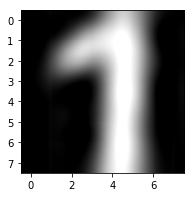

In [9]:
figsize(5,3)
num = 1500
plt.imshow(digits.data[num].reshape(8,8), cmap="gray", interpolation="bessel")
print(digits.target[num])

In [12]:
samples = digits.data
labels = digits.target

n_samples, n_features = samples.shape
print(samples.shape)

(1797, 64)


In [18]:
model = manifold.TSNE(learning_rate=100)
# model = manifold.TSNE(n_components=2, init='pca', random_state=0)
%time transformed = model.fit_transform(samples)

CPU times: user 51.6 s, sys: 6.36 s, total: 58 s
Wall time: 59.7 s


In [19]:
xs = transformed[:,0]
ys = transformed[:,1]

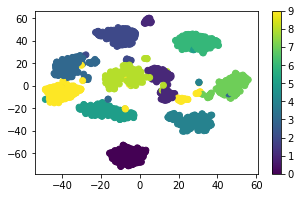

In [22]:
fig, ax = plt.subplots()
sct = plt.scatter(xs, ys, c=labels)
fig.colorbar(sct)